In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
data = pd.read_csv("AmesHousing.csv")
print(data.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
!pip install seaborn

In [7]:
print(data.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [10]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.dropna(inplace=True)

In [11]:
data = pd.get_dummies(data, drop_first=True)

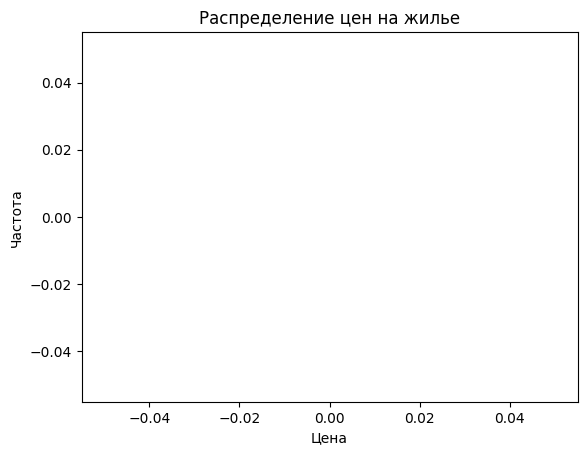

In [12]:
sns.histplot(data["SalePrice"], kde=True)
plt.title('Распределение цен на жилье')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

C:\Users\monka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\monka\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


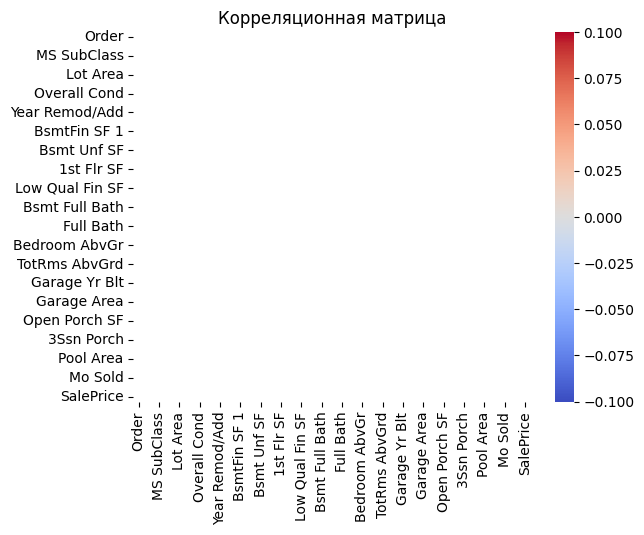

In [15]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [14]:
data = data.select_dtypes(include=[np.number]) 

In [16]:
print(data.dtypes)

Order                int64
PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Y

In [17]:
%matplotlib inline

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object
Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         

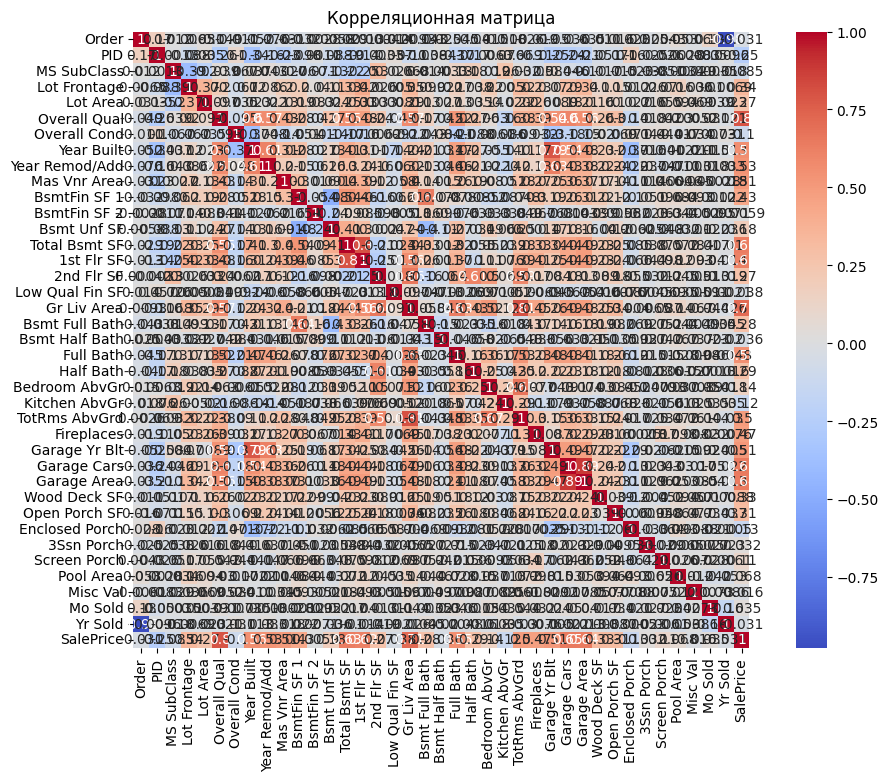

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("AmesHousing.csv")

# Проверка типов данных
print(data.dtypes)

# Оставляем только числовые столбцы
data = data.select_dtypes(include=[np.number])

# Проверка пропущенных значений
print(data.isnull().sum())

# Заполнение пропущенных значений средним значением
data.fillna(data.mean(), inplace=True)

# Вычисление корреляционной матрицы
corr_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))  # Увеличиваем размер графика
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [3]:
# Выберем только признаки с высокой корреляцией с SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

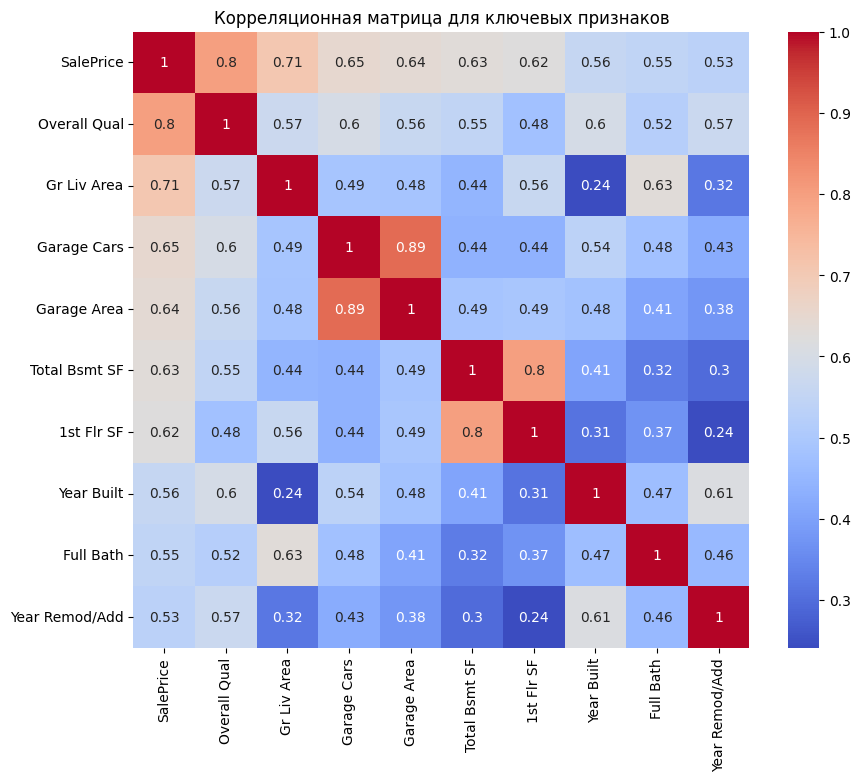

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица для ключевых признаков')
plt.show()

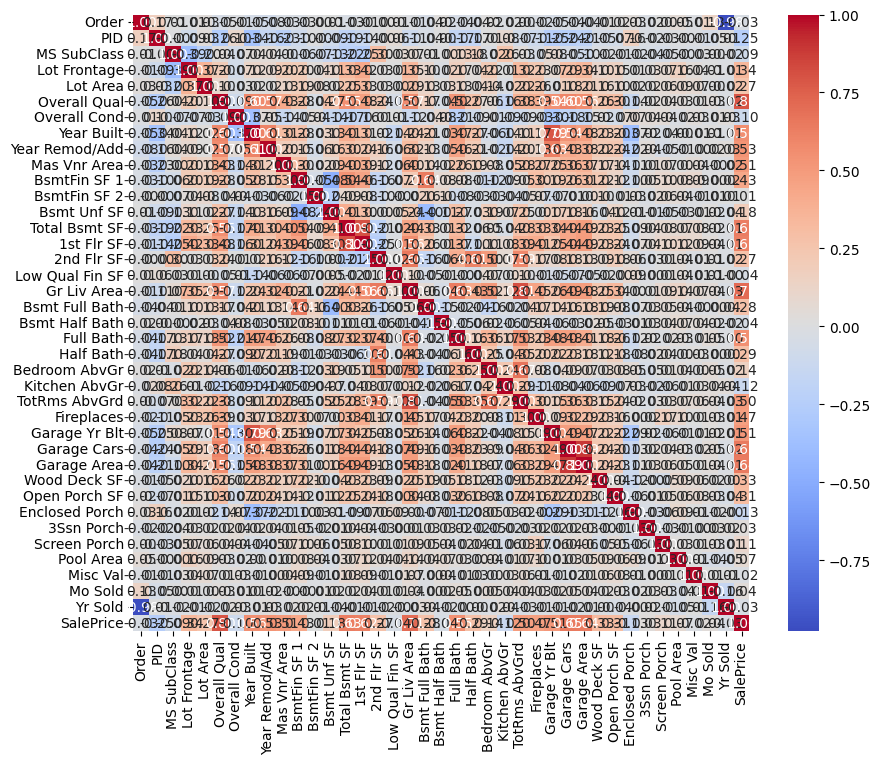